---
INSTALACJE
---
Uruchamiamy tylko raz

---

In [25]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [26]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [27]:
pip install "https://github.com/explosion/spacy-models/releases/download/pl_core_news_lg-3.4.0/pl_core_news_lg-3.4.0.tar.gz"

  Created wheel for pl-core-news-lg: filename=pl_core_news_lg-3.4.0-py3-none-any.whl size=573594374 sha256=3d6de6a3ba756ff5caf150b2266d125dc208d6b5ae91513ebfd11b1b080ac6f1
  Stored in directory: c:\users\1boze\appdata\local\pip\cache\wheels\1a\e6\99\d8aa2394cd5931017ae133d0e4dfb392a7434904d791d4902e
Successfully built pl-core-news-lg
  Attempting uninstall: pl-core-news-lg
    Found existing installation: pl-core-news-lg 3.4.0
    Uninstalling pl-core-news-lg-3.4.0:
      Successfully uninstalled pl-core-news-lg-3.4.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [28]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [29]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


---
KOD
---

---

In [30]:
import spacy
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

In [33]:
nlp = spacy.load("pl_core_news_lg")

In [34]:
df =pd.read_csv("data/processed_dataset_12_11_2021.csv")

---
**ANALIZOWANIE CZĘŚCI MOWY**

---

Poniżej funkcja zwracająca słownik dla jednego tekstu przeanalizowanego przez *pl_core_news_lg*
Struktura zwracanego słownika wygląda następująco:
```python
{
  "CZĘŚĆ_MOWY": [("NAJPOPULARNIEJSZE SŁOWO": 200), ..., ("NAJMNIEJ POPULARNE SŁOWO" : 1)],
  # ...
}
```

In [35]:
def getMostPopularSpeechParts(providedDoc):
  acceptedSpeechParts = ['NOUN', 'VERB','ADJ','PROPN']
  speechParts = {}
  mostPopularSpeechParts = {}
  for token in providedDoc:
    if token.pos_ in acceptedSpeechParts:
      speechPartList = []
      if token.pos_ in speechParts.keys():
        if speechParts[token.pos_] is None:
          speechParts[token.pos_] = []
        speechPartList.extend(speechParts[token.pos_])
      speechPartList.append(token.text)
      speechParts[token.pos_] = speechPartList

  for index, item in enumerate(speechParts.values()):
    speechPartName = list(speechParts.keys())[index]
    if len(item) > 1:
      counted_dict = dict((i, item.count(i)) for i in item)
      counted_list = [(k, v) for k, v in counted_dict.items()]
      counted_list.sort(key=lambda y: y[1],reverse=True)
      mostPopularSpeechParts[speechPartName] = [k for (k,v) in counted_list]
  return mostPopularSpeechParts

In [36]:
categories = {}

result = {}

for i in range(len(df)):
  if not df['label_high'][i] in categories:
    categories[df['label_high'][i]]=''

  categories[df['label_high'][i]] =str(categories[df['label_high'][i]])+" "+str(df['text_full'][i])

for i in categories:
  # analise the text with pl_core_news_lg package
  analisedText = nlp(categories[i].replace("  "," "))
  # get most popular parts of speech from the document
  doc = getMostPopularSpeechParts(analisedText)
  # save most popular speech parts to the dictionary
  result[i] = doc

# create a dataframe
dataFrame = pd.DataFrame(result)
# save data to csv
dataFrame.to_csv("data/most_popular_words.csv")

In [37]:
data = pd.read_csv("data/most_popular_words.csv")
data

,Unnamed: 0,prawo cywilne,prawo administracyjne,prawo farmaceutyczne,prawo pracy,prawo medyczne,prawo karne,prawo miädzynarodowe,prawo podatkowe,prawo konstytucyjne,odpowiedzi niestandardowe,tu interpolska
0,NOUN,"['klient', 'klientka', 'sposób', 'wspólnoty', ...","['klient', 'klientka', 'danych', 'sposób', 'sp...","['klientka', 'apteki', 'apteka', 'recepty', 'f...","['pracy', 'pracodawca', 'pracę', 'klientka', '...","['klientka', 'klient', 'pracy', 'lekarz', 'lek...","['klientka', 'klient', 'prawa', 'świadka', 'ob...","['klient', 'klientka', 'diety', 'sposób', 'uni...","['klientka', 'klient', 'kasy', 'obowiązek', 'p...","['klient', 'przepisy', 'konstytucją', 'powroci...","['klientka', 'umowy', 'klientkę', 'klienta', '...","['klienta', 'oddziale', 'polisa', 'zakresem', ..."
1,ADJ,"['mieszkaniowej', 'mieszkaniowa', 'przedmiotow...","['osobowych', 'przedmiotowej', 'mieszkaniowej'...","['leczniczy', 'szpitalnej', 'aptecznego', 'far...","['wypoczynkowego', 'innym', 'zobowiązany', 'wy...","['medycznej', 'covidowego', 'medyczną', 'covid...","['prawne', 'przedmiotowej', 'zawodowej', 'karn...","['europejskiej', 'polskiej', 'wielkiej', 'konk...","['fiskalnej', 'fiskalną', 'gospodarczej', 'lec...","['zgodne', 'wezwana', 'zwolniona', 'lekarskiej...","['przedmiotowej', 'przesłana', 'zgodna', 'medy...","['ewentualne', 'medyczne', 'popełnione', 'zdro..."
2,VERB,"['może', 'należy', 'powinna', 'powinien', 'ma'...","['może', 'ma', 'zrobić', 'należy', 'powinien',...","['może', 'musi', 'powinna', 'należy', 'można',...","['może', 'ma', 'zobowiązać', 'powinien', 'żąda...","['może', 'ma', 'powinien', 'powinna', 'należy'...","['może', 'ma', 'zrobić', 'można', 'podjąć', 'n...","['może', 'musi', 'udzielać', 'spełniać', 'powi...","['może', 'ma', 'powinna', 'wystawić', 'powinie...","['wyjść', 'wolno', 'może', 'pobiegać', 'pojeźd...","['może', 'powinna', 'ma', 'mógł', 'zawiera', '...","['obejmuje', 'szkoda', 'posiada']"
3,PROPN,"['internet', 'oc', 'vat', 'michał', 'ac', 'iv'...","['panipana', 'ue', 'rodo', 'vat', 'znanylekarz...","['auctore', 'nip', 'polsce', 'ue', 'otc', 'vat...","['nova', 'med', 'koronawirusa', 'lublinie', 'c...","['sor', 'koronawirusa', 'vat', 'pes', 'nfz', '...","['sor', 'warszawie', 'vat', 'ponosiłby', 'niep...","['polsce', 'windows', 'brytanii']","['vat', 'pkd', 'nip', 'zus', 'rż', 'usa']",NaN,"['oc', 'google', 'krszr', 'msigm']",NaN


---
**SIECI SAMOORGANIZUJĄCE SIĘ**


---

https://rubikscode.net/2021/07/06/implementing-self-organizing-maps-with-python-and-tensorflow/

https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/

In [190]:
def remove_common(a, b):
    a, b = list(set(a) - set(b)),list(set(b) - set(a))
    return (a,b)

def getUniqueDictionary(dictionary):
    speechParts = ['NOUN', 'VERB','ADJ','PROPN']
    uniqueDictionary = {}
    for part in speechParts:
        for category in dictionary:
            part1 = dictionary[category]
            for category2 in dictionary:
                part2 = dictionary[category2]
                if category is not category2:
                    if category in uniqueDictionary:
                        part1 = uniqueDictionary[category]
                    if category2 in uniqueDictionary:
                        part2 = uniqueDictionary[category2]
                    if part not in part1.keys():
                        part1[part] = []
                    if part not in part2.keys():
                        part2[part] = []
                    uList1, uList2 = remove_common(part1[part],part2[part])
                    part1[part] = uList1
                    part2[part] = uList2
                    uniqueDictionary[category] = part1
                    uniqueDictionary[category2] = part2
    return uniqueDictionary

def countUniqueWords(dictionary):
    countedDictionary = []
    for part in dictionary:
        values = []
        for words in dictionary[part].values():
            values.append(len(words))
        countedDictionary.append(values)
    return countedDictionary

def reverseDictionary(dictionary):
    speechParts = ['NOUN', 'VERB','ADJ','PROPN']
    reversedDictionary = {}
    for part in speechParts:
        partDictionary = {}
        for legalAffairs in dictionary:
            parts = dictionary[legalAffairs]
            partDictionary[legalAffairs] = parts[part]
        reversedDictionary[part] = partDictionary
    return reversedDictionary



In [202]:
from sklearn.preprocessing import scale
from minisom import MiniSom
import numpy as np
uniqueDictionary = getUniqueDictionary(result)
reversedDictionary = reverseDictionary(uniqueDictionary)
countedUniqueWords = countUniqueWords(reversedDictionary)
legalAffairs = ['prawo cywilne', 'prawo administracyjne', 'prawo farmaceutyczne','prawo pracy', 'prawo medyczne', 'prawo karne','prawo miädzynarodowe','prawo podatkowe','prawo konstytucyjne']
speechParts = ['NOUN', 'VERB','ADJ','PROPN']
speechPartColor = {'NOUN': 'darkgreen', 'VERB' :'crimson','ADJ':'pink','PROPN':'blue'}
X = countedUniqueWords
size = 20
som = MiniSom(size, size, len(X[0]),neighborhood_function='gaussian', sigma=1.5,random_seed=1)
print(X)
som.pca_weights_init(X)
som.train_random(X, 1000, verbose=True)

[[615, 309, 249, 287, 787, 355, 50, 128, 7, 113, 24], [197, 68, 73, 126, 267, 119, 18, 30, 4, 28, 3], [399, 229, 208, 301, 651, 181, 24, 74, 2, 54, 7], [14, 9, 10, 8, 23, 4, 3, 2, 0, 3, 0]]
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.0676453635391046e-06


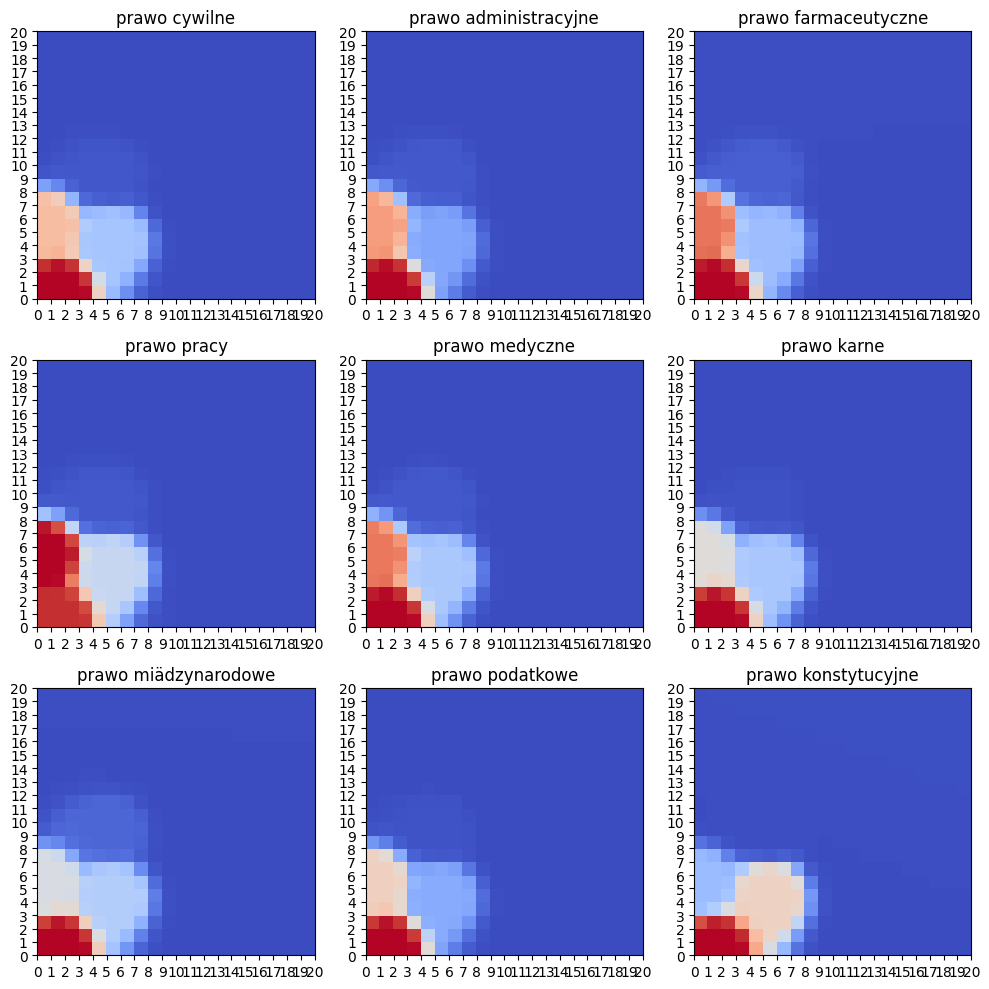

In [205]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(legalAffairs):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()